# DPS as a function of frequency experiment, Maccabi Haifa, Otc. $31^{st}$

In [1]:
# importing mplot3d toolkits
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
!pip3 install playsound
!pip3 install PyObjC


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python3.11 -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [3]:
df = pd.read_csv("_data/raw-data.csv")
(df_yonatan, df_shmuel, df_tzuf, df_adam) = (
    df[df["Swimmer Name"] == name] for name in
    ["Yonatan", "Shmuel", "Tzuf", "Adam"])

In [4]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [5]:
def plot3d(df: pd.DataFrame) -> None:
    (X, Y, Z) = (df[col] for col in ["Freq", "Num strokes", "Time"])
    ax = plt.figure().add_subplot(projection='3d')
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    surf = ax.plot_trisurf(X, Y, Z,
                           cmap="summer",
                           linewidth=0,
                           antialiased=False)
    ax.set_xlabel("stroke/minute")
    ax.set_ylabel("# Strokes")
    ax.set_zlabel("Time")
    plt.title("Frequency, DPS, time hyperplane")
    plt.show()

    display(df[["Freq", "Num strokes"]].corr())
    display(df[["Num strokes", "Time"]].corr())

In [6]:
import seaborn as sns


def dervatives(df: pd.DataFrame) -> None:
    fig, ax = plt.subplots(ncols=2)
    sns.regplot(data=df, x="Freq", y="Num strokes", ax=ax[0])
    sns.regplot(data=df, x="Freq", y="Time", ax=ax[1])
    fig.subplots_adjust(wspace=0.5)
    plt.show()

In [12]:
def display_analysis(df: pd.DataFrame) -> None:
    display(df.sort_values(["Time"], ascending=[False]))
    plot3d(df)
    dervatives(df)

## Introduction

This experiment is the first phase of our endevour to optimize the frontend of the race.
This optimization effort is done in a situation in which maximizing will hurt us on others.
(_e.g._, increasing frequency in most cases will favor the split time on one hand,
and would hurt the DPS as well as the physical condition of the swimmer). 

## About the results

Our experiment is consisted of 4-5 time of pairs of $25m$ interval, in linearily increasing cycle frequency.
The $X$ axis is the frequency (mesearued in cycles/minute),
the $Y$ axis represents the Distance-per-stroke (DPS), whereas the $Z$ axis is the measured time.

The experiment was done in a standard SCM pool.

## 1. Yonatan - Breast stroke

,Swimmer Name,Freq,Cycle time,Num strokes,Time
0,Yonatan,40.8,1.470,7,16.40
2,Yonatan,42.3,1.420,8,16.20
4,Yonatan,41.7,1.440,8,16.00
6,Yonatan,46.9,1.280,9,15.92
1,Yonatan,38.0,1.580,7,15.70
3,Yonatan,45.3,1.325,8,15.70
8,Yonatan,54.1,1.110,10,15.40
5,Yonatan,40.8,1.470,7,15.10
9,Yonatan,52.6,1.140,9,15.00
7,Yonatan,53.6,1.120,9,14.80


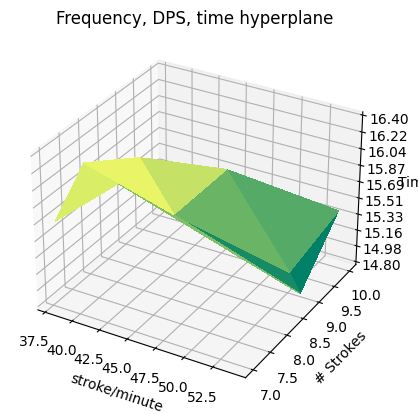

,Freq,Num strokes
Freq,1.000000,0.915114
Num strokes,0.915114,1.000000


,Num strokes,Time
Num strokes,1.000000,-0.387533
Time,-0.387533,1.000000


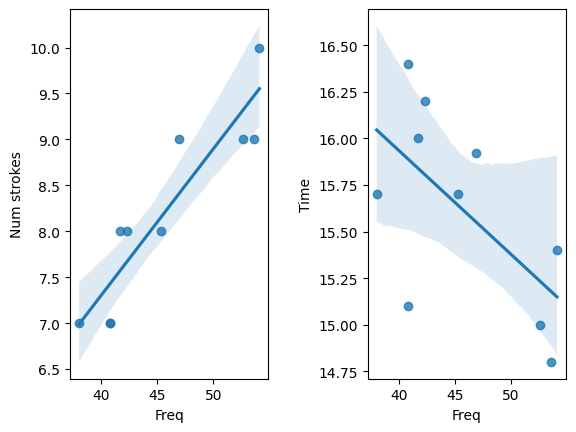

In [8]:
display_analysis(df_yonatan)

<video width="500" height="240" 
       src="_data/yonatan_best.mp4"  
       controls>
</video>

## 2. Tzuf (Fly)

,Swimmer Name,Freq,Cycle time,Num strokes,Time
21,Tzuf,50.0,1.200,10,16.60
23,Tzuf,52.6,1.140,10,16.00
20,Tzuf,46.9,1.280,9,15.75
27,Tzuf,55.6,1.080,10,15.50
22,Tzuf,51.3,1.170,9,15.34
24,Tzuf,53.6,1.120,9,15.00
25,Tzuf,49.2,1.220,9,14.95
26,Tzuf,43.6,1.375,8,14.80
28,Tzuf,53.6,1.120,10,14.70


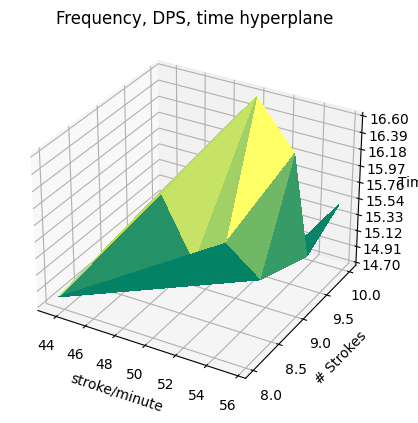

,Freq,Num strokes
Freq,1.000000,0.757764
Num strokes,0.757764,1.000000


,Num strokes,Time
Num strokes,1.000000,0.503462
Time,0.503462,1.000000


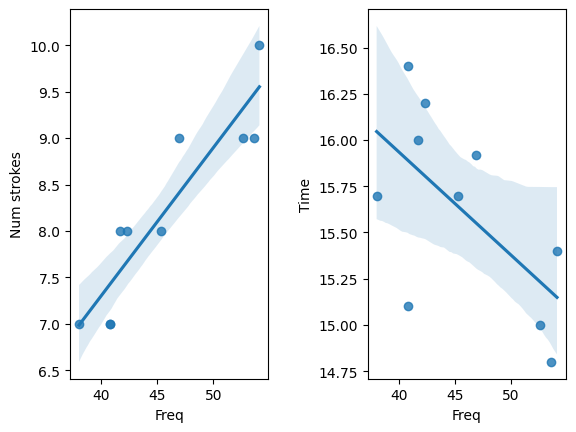

In [9]:
display_analysis(df_tzuf)

<video width="500" height="240" 
       src="_data/tzuf_best.mp4"  
       controls>
</video>

## 3. Adam - Back

,Swimmer Name,Freq,Cycle time,Num strokes,Time
29,Adam,47.2,1.27,13,14.56
30,Adam,40.0,1.50,12,14.00
31,Adam,40.8,1.47,13,14.00
33,Adam,43.8,1.37,14,13.40
32,Adam,48.8,1.23,13,13.20
37,Adam,56.6,1.06,15,13.11
35,Adam,45.5,1.32,14,13.05
36,Adam,45.1,1.33,13,13.03
39,Adam,51.3,1.17,15,12.99
34,Adam,43.5,1.38,13,12.90


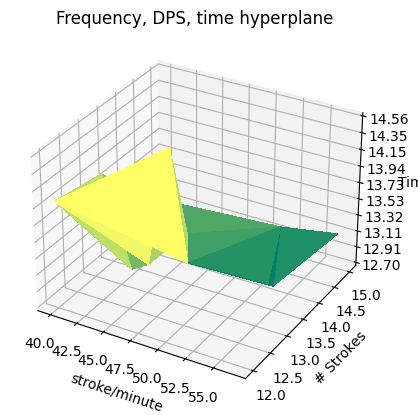

,Freq,Num strokes
Freq,1.00000,0.75753
Num strokes,0.75753,1.00000


,Num strokes,Time
Num strokes,1.000000,-0.532549
Time,-0.532549,1.000000


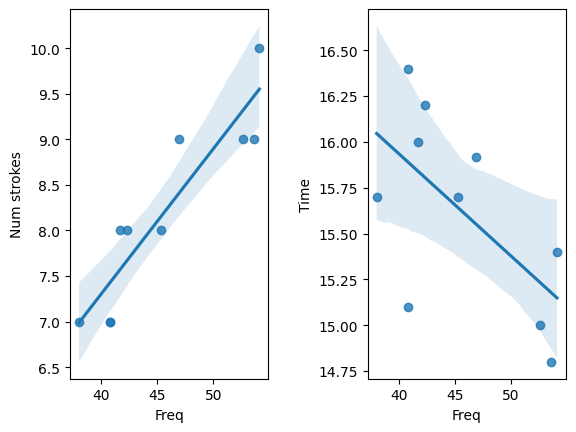

In [10]:
display_analysis(df_adam)

## Controled speed

Clocking 13:20 on $F < 49$

<video width="500" height="240" 
       src="_data/adam_s3_2.mp4"
       controls>
</video>

12.9 with $F=53$

<video width="500" height="240" 
       src="_data/adam_s5_2.mp4"
       controls>
</video>

## 4. Shmuel (Breast stroke)

,Swimmer Name,Freq,Cycle time,Num strokes,Time
11,Shmuel,39.0,1.45,6,16.70
10,Shmuel,43.0,1.48,6,16.45
12,Shmuel,38.7,1.55,6,16.45
13,Shmuel,39.5,1.52,6,15.90
14,Shmuel,44.5,1.35,7,15.47
16,Shmuel,42.3,1.42,7,15.47
18,Shmuel,51.7,1.16,8,15.00
17,Shmuel,50.0,1.20,8,14.95
15,Shmuel,47.0,1.28,7,14.94
19,Shmuel,52.2,1.15,8,14.60


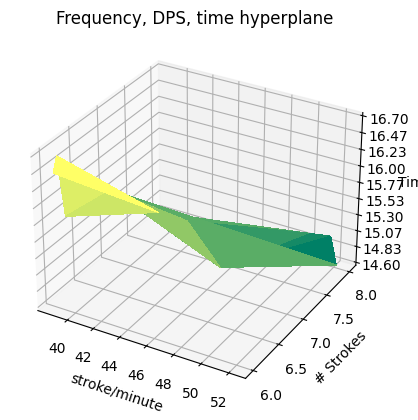

,Freq,Num strokes
Freq,1.000000,0.940431
Num strokes,0.940431,1.000000


,Num strokes,Time
Num strokes,1.000000,-0.912364
Time,-0.912364,1.000000


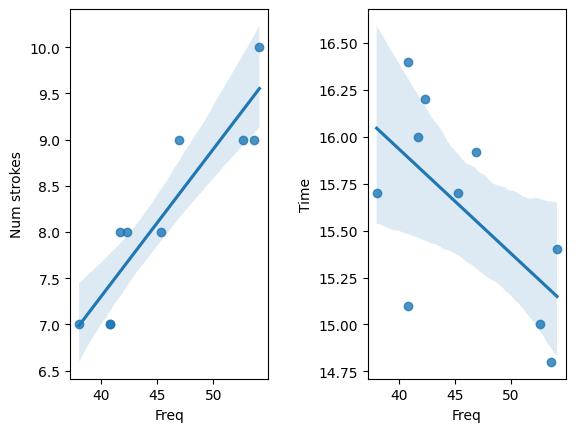

In [11]:
display_analysis(df_shmuel)

7 strokes, $14.7s, \lambda=1.18s$

<video width="500" height="240" 
       src="_data/shmuel_s3_2.mp4"
       controls>
</video>